<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/attention_multihead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

## Multi-Head Attention

Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. Instead of performing a single attention function, multi-head attention performs attention multiple times in parallel, then combines the results.

### Mathematical Formulation

Given an input sequence $X \in \mathbb{R}^{n \times d}$, multi-head attention with $h$ heads is computed as follows:

1. **For each head $i$ from $1$ to $h$**:
   - Compute projection matrices for queries, keys, and values:
     $$Q_i = XW_Q^i, \quad K_i = XW_K^i, \quad V_i = XW_V^i$$
     where $W_Q^i \in \mathbb{R}^{d \times d_k}$, $W_K^i \in \mathbb{R}^{d \times d_k}$, and $W_V^i \in \mathbb{R}^{d \times d_v}$ are learned parameters, with $d_k = d_v = d/h$.

   - Compute the attention output for head $i$:
     $$\text{head}_i = \text{Attention}(Q_i, K_i, V_i) = \text{softmax}\left(\frac{Q_iK_i^T}{\sqrt{d_k}}\right)V_i$$

2. **Concatenate the outputs of all heads**:
   $$\text{Concat}(\text{head}_1, \text{head}_2, \ldots, \text{head}_h) \in \mathbb{R}^{n \times (h \cdot d_v)}$$


   $$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \ldots, \text{head}_h)W_O$$
   where $W_O \in \mathbb{R}^{(h \cdot d_v) \times d}$ is a learned parameter.

```mermaid
graph TB
    X[Input X] --> |WQ1| Q1[Q1]
    X --> |WK1| K1[K1]
    X --> |WV1| V1[V1]
        Xkv --> |Wk_decoder|Kd[Decoder K]
        Xkv --> |Wv_decoder|Vd[Decoder V]
        D[Decoder Input Xq] --> |Wq_decoder|Qd[Decoder Q]
        Qd & Kd & Vd --> A[Cross-Attention]
    X --> |WV2| V2[V2]
    Q2 & K2 & V2 --> A2[Head 2]
    
    X --> |WQh| Qh[Qh]
    X --> |WKh| Kh[Kh]
    X --> |WVh| Vh[Vh]
    Qh & Kh & Vh --> Ah[Head h]
    
    A1 & A2 & Ah --> C[Concatenate]
    C --> |WO| O[Output]
```

### Multi-Head Attention Example

Let's consider a simplified example with input $X \in \mathbb{R}^{3 \times 4}$ and $h=2$ heads:

$$X = \begin{bmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 1 & 1 & 1 \end{bmatrix}$$

We'll use simplified weight matrices for each head, with $d_k = d_v = 2$:

**Head 1**:
$$W_Q^1 = \begin{bmatrix} 1 & 0 \\ 0 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad W_K^1 = \begin{bmatrix} 1 & 0 \\ 0 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}, \quad W_V^1 = \begin{bmatrix} 1 & 0 \\ 0 & 0 \\ 0 & 1 \\ 0 & 0 \end{bmatrix}$$

**Head 2**:
$$W_Q^2 = \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 0 \\ 0 & 1 \end{bmatrix}, \quad W_K^2 = \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 0 \\ 0 & 1 \end{bmatrix}, \quad W_V^2 = \begin{bmatrix} 0 & 0 \\ 1 & 0 \\ 0 & 0 \\ 0 & 1 \end{bmatrix}$$

And output projection matrix $W_O = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$

1. **Compute for Head 1**:

   $$Q_1 = XW_Q^1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{bmatrix}$$
   $$K_1 = XW_K^1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{bmatrix}$$
   $$V_1 = XW_V^1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{bmatrix}$$

   $$\text{head}_1 = \text{Attention}(Q_1, K_1, V_1) = \begin{bmatrix} 0.65 & 0.35 \\ 0.35 & 0.65 \\ 0.5 & 0.5 \end{bmatrix}$$

2. **Compute for Head 2**:

   $$Q_2 = XW_Q^2 = \begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 1 & 1 \end{bmatrix}$$
   $$K_2 = XW_K^2 = \begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 1 & 1 \end{bmatrix}$$
   $$V_2 = XW_V^2 = \begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 1 & 1 \end{bmatrix}$$

   $$\text{head}_2 = \text{Attention}(Q_2, K_2, V_2) = \begin{bmatrix} 0.33 & 0.33 \\ 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}$$

3. **Concatenate the outputs**:
   $$\text{Concat}(\text{head}_1, \text{head}_2) = \begin{bmatrix} 0.65 & 0.35 & 0.33 & 0.33 \\ 0.35 & 0.65 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix}$$

4. **Apply the output projection**:
   $$\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2)W_O = \begin{bmatrix} 0.65 & 0.35 & 0.33 & 0.33 \\ 0.35 & 0.65 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix}$$

The final output captures different aspects of the relationships between tokens through multiple attention heads, providing a richer representation than single-head attention.

## PyTorch Implementation

Let's implement the multi-head attention mechanism using PyTorch:

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads  # Dimension of each head
        
        # Linear projections for Q, K, V for all heads (performed in batch)
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)  # Output projection
        
    def split_heads(self, x, batch_size):
        """
        Split the last dimension into (num_heads, d_k)
        Reshape from (batch_size, seq_length, d_model) to (batch_size, num_heads, seq_length, d_k)
        """
        x = x.view(batch_size, -1, self.num_heads, self.d_k)
        return x.permute(0, 2, 1, 3)
    
    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)
        
        # Linear projections
        q = self.W_q(q)  # (batch_size, seq_len_q, d_model)
        k = self.W_k(k)  # (batch_size, seq_len_k, d_model)
        v = self.W_v(v)  # (batch_size, seq_len_v, d_model)
        
        # Split heads
        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, d_k)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, d_k)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, d_k)
        
        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / np.sqrt(self.d_k)
        
        if mask is not None:
            # Apply mask (broadcast across batch and heads)
            scores = scores.masked_fill(mask == 0, -1e9)
        
        attention_weights = F.softmax(scores, dim=-1)
        context = torch.matmul(attention_weights, v)  # (batch_size, num_heads, seq_len_q, d_k)
        
        # Combine heads
        context = context.permute(0, 2, 1, 3).contiguous()  # (batch_size, seq_len_q, num_heads, d_k)
        context = context.view(batch_size, -1, self.d_model)  # (batch_size, seq_len_q, d_model)
        
        # Final linear projection
        output = self.W_o(context)  # (batch_size, seq_len_q, d_model)
        
        return output, attention_weights

## Example Usage

Let's demonstrate the usage of our multi-head attention implementation with a simple example:

In [5]:
# Set up parameters
batch_size = 2
seq_length = 4
d_model = 8
num_heads = 2

# Create random input tensors
x = torch.randn(batch_size, seq_length, d_model)

# Initialize multi-head attention
multi_head_attn = MultiHeadAttention(d_model, num_heads)

# Forward pass (self-attention)
output, attention_weights = multi_head_attn(x, x, x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {attention_weights.shape}")

Input shape: torch.Size([2, 4, 8])
Output shape: torch.Size([2, 4, 8])
Attention weights shape: torch.Size([2, 2, 4, 4])


## Visualizing Attention Weights

Let's visualize the attention weights from one of our attention heads:

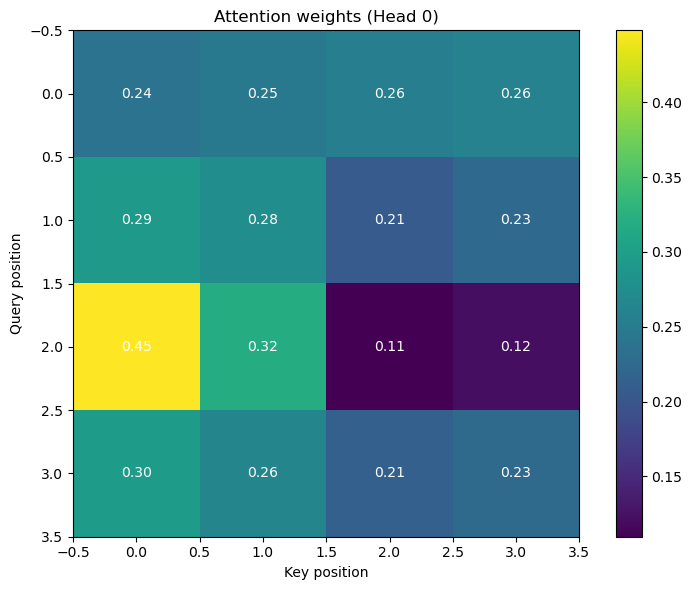

In [6]:
def plot_attention(attention_weights, head=0):
    """Plot attention weights for a specific head."""
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Get attention weights for the first batch item and specified head
    attn = attention_weights[0, head].detach().numpy()
    
    # Plot as heatmap
    im = ax.imshow(attn, cmap='viridis')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    
    # Set labels
    ax.set_title(f"Attention weights (Head {head})")
    ax.set_xlabel("Key position")
    ax.set_ylabel("Query position")
    
    # Add annotations
    for i in range(attn.shape[0]):
        for j in range(attn.shape[1]):
            text = ax.text(j, i, f"{attn[i, j]:.2f}",
                           ha="center", va="center", color="white" if attn[i, j] < 0.5 else "black")
    
    plt.tight_layout()
    return fig

# Plot attention weights for head 0
fig = plot_attention(attention_weights, head=0)
plt.show()

## Advantages of Multi-Head Attention

1. **Parallel processing**: Multiple attention heads can process information in parallel, allowing the model to capture different aspects of the input simultaneously.

2. **Different representation subspaces**: Each head can focus on different parts of the input space, allowing the model to attend to information from different representation subspaces.

3. **Capturing various relationships**: Different attention heads can learn to represent different types of relationships between tokens (e.g., syntactic dependencies, semantic relationships).

4. **Improved performance**: Multi-head attention generally performs better than single-head attention as it can capture more complex patterns in the data.

## Applications in Transformer Models

Multi-head attention is a core component of transformer architectures, used in:

1. **Self-attention**: Where queries, keys, and values come from the same sequence
2. **Cross-attention**: Where queries come from one sequence (e.g., decoder), and keys and values from another (e.g., encoder)
3. **Encoder-decoder attention**: Used in the decoder to attend to the encoder's output

These attention mechanisms have revolutionized natural language processing and are the foundation of models like BERT, GPT, and T5.